In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
data = pd.read_csv("CVD_cleaned.csv")
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
#checking the datails of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
#describing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [5]:
#checking the string columns
print(str(data))

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [6]:
#checking the sahpe fo the data
data.shape

(308854, 19)

In [7]:
#checking for duplicates
print(data.duplicated().sum())
#dropping duplicates
data.drop_duplicates(inplace=True,keep='first')
data.shape

80


(308774, 19)

In [8]:
#chceking the number of unique values in each column of the data
data.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

In [9]:
#checking the data for missing values
data.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

<h1>Exploratory Data Analysis</h1?>

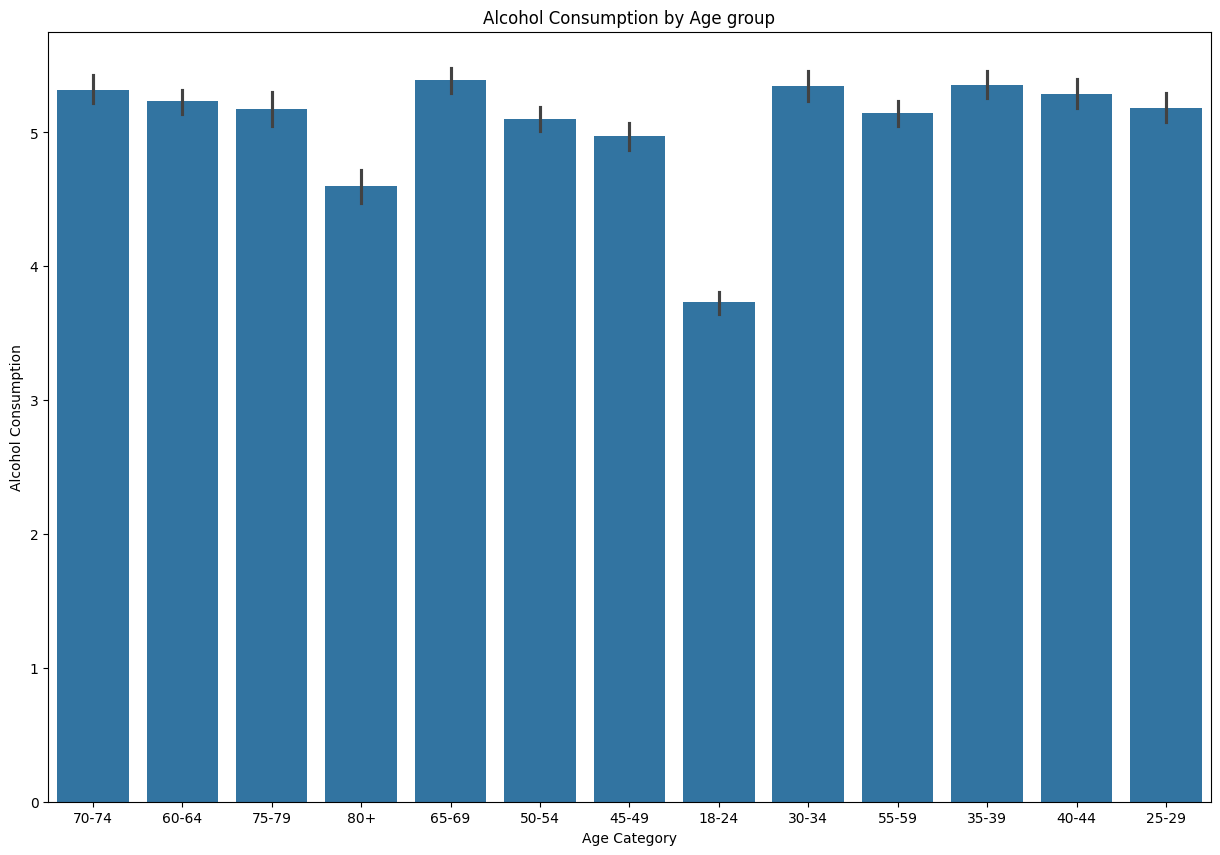

<Figure size 640x480 with 0 Axes>

In [10]:
ax = sns.barplot(x= data["Age_Category"] , y = data["Alcohol_Consumption"])
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Alcohol Consumption by Age group")
plt.xlabel("Age Category")
plt.ylabel("Alcohol Consumption")
plt.show()
plt.tight_layout()

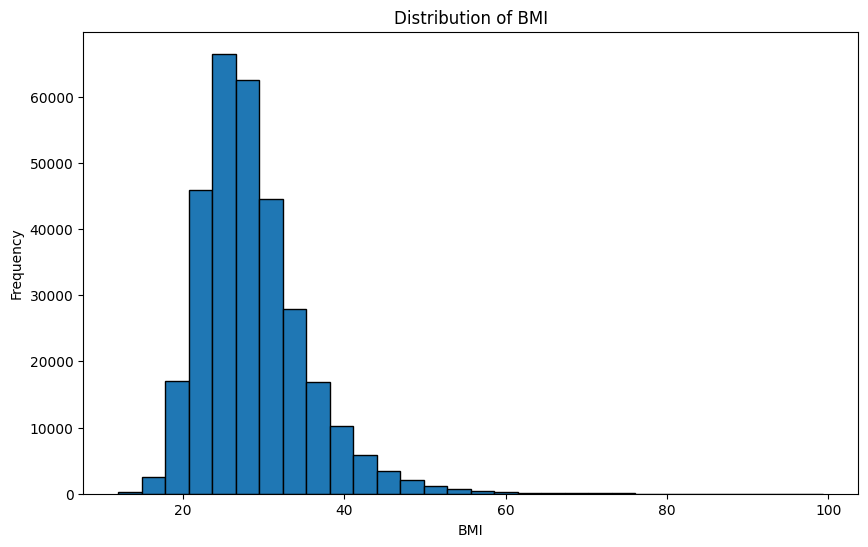

In [11]:
#dirtribution of BMI across the data
plt.figure(figsize=(10, 6))
plt.hist(data['BMI'], bins=30, edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Heart_Disease', ylabel='count'>

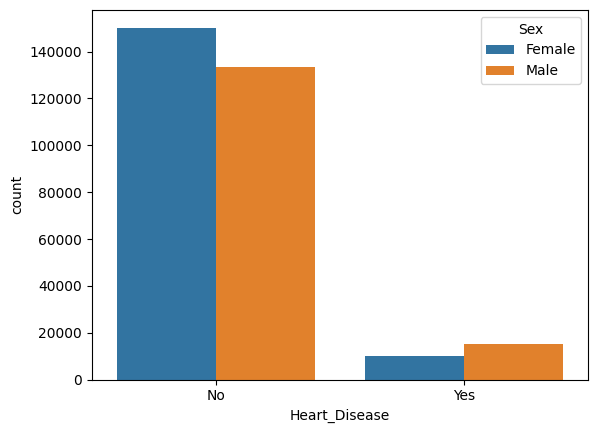

In [12]:
#visualization of patients with heart disease.
sns.countplot(data, x="Heart_Disease", hue="Sex")

<Axes: xlabel='Depression', ylabel='count'>

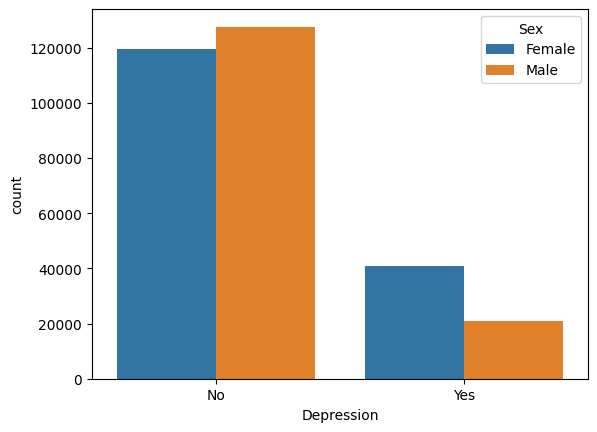

In [13]:
sns.countplot(data, x="Depression", hue="Sex")

<Axes: xlabel='Arthritis', ylabel='count'>

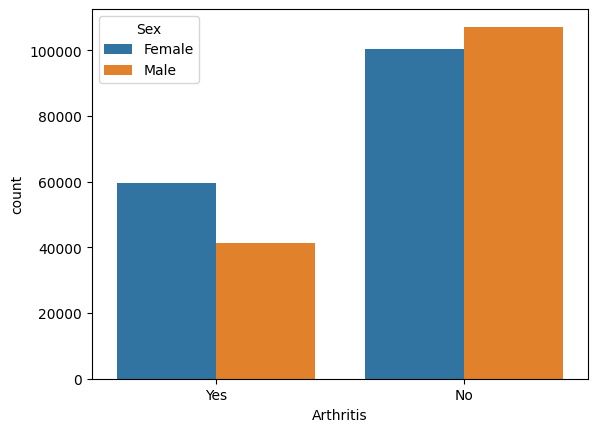

In [14]:
sns.countplot(data, x="Arthritis", hue="Sex")

C:\Users\HP\AppData\Local\Temp\ipykernel_12460\1148083991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Category', y='Weight_(kg)', data=data, palette='coolwarm', legend=False)


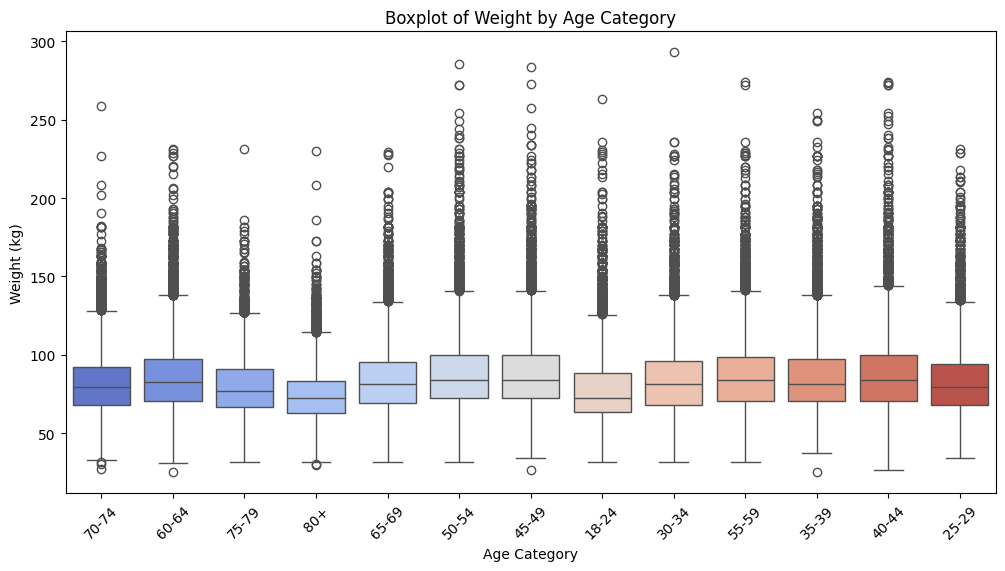

In [15]:
#age vs weight
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Weight_(kg)', data=data, palette='coolwarm', legend=False)
plt.title('Boxplot of Weight by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()

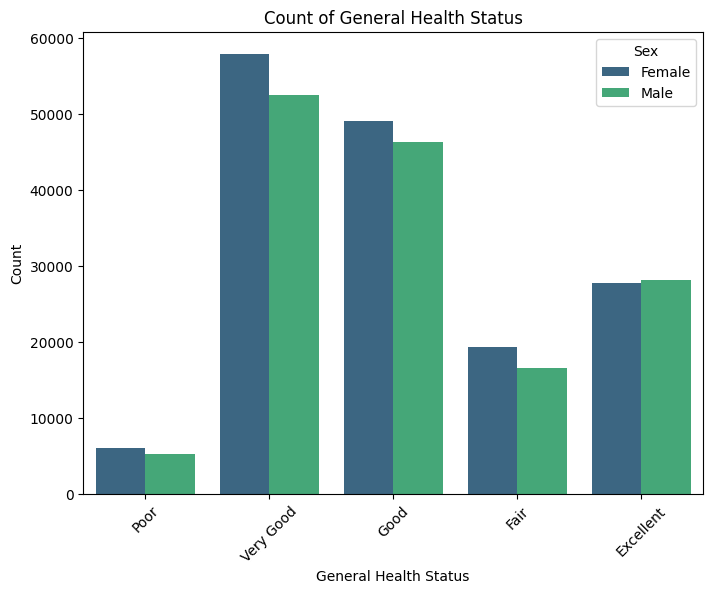

In [16]:
#general health visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='General_Health', palette='viridis', hue='Sex')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
#checking out the numeric columns
numeric = data.select_dtypes(['float64', 'int64']).columns.tolist()
numeric

['Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

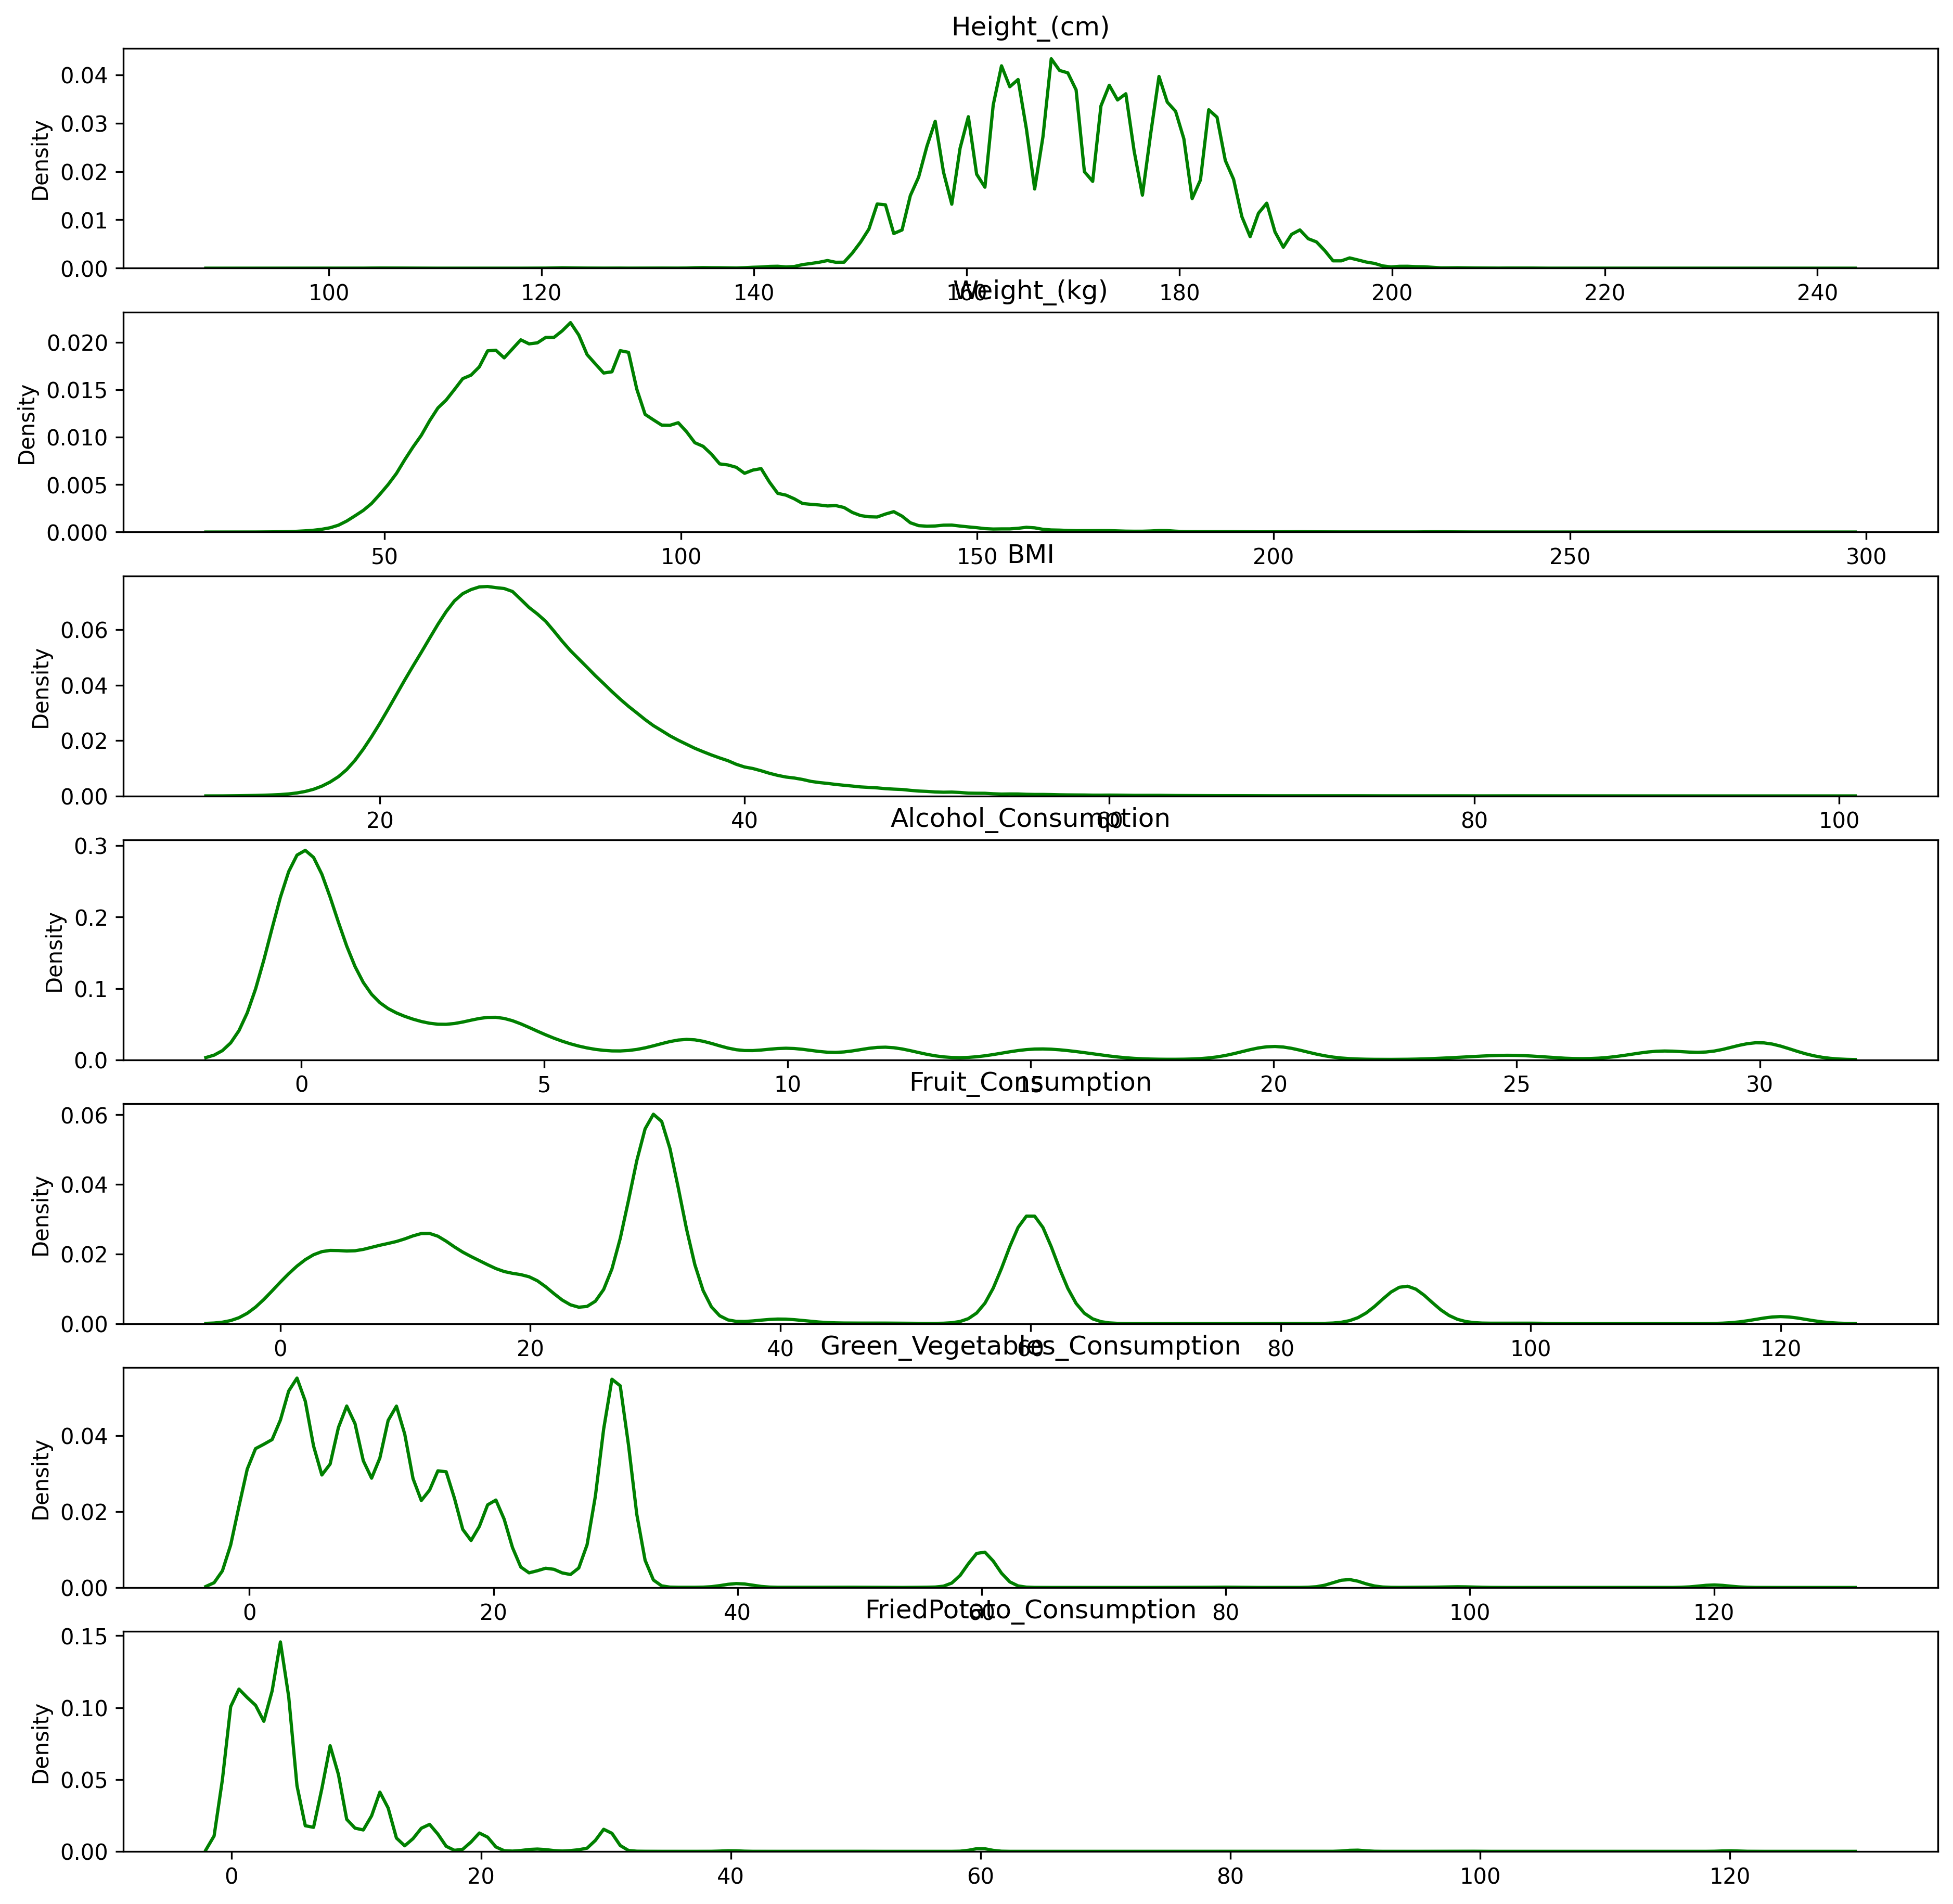

In [18]:
fig, ax = plt.subplots(7,1, figsize=(15,15), dpi=300)
ax = ax.flatten()
for i, col in enumerate(numeric):
    sns.kdeplot(data[col],ax=ax[i],color='g')
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)

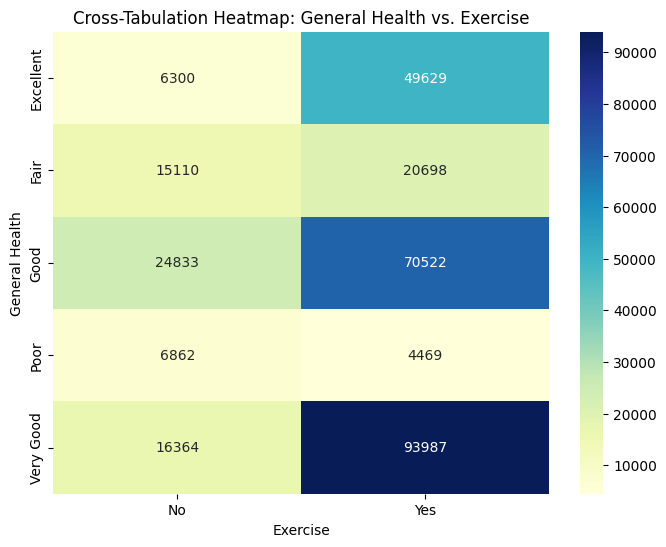

In [19]:
#checking the effect of exercise on general health
crosstab = pd.crosstab(data['General_Health'], data['Exercise'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: General Health vs. Exercise')
plt.xlabel('Exercise')
plt.ylabel('General Health')
plt.show()

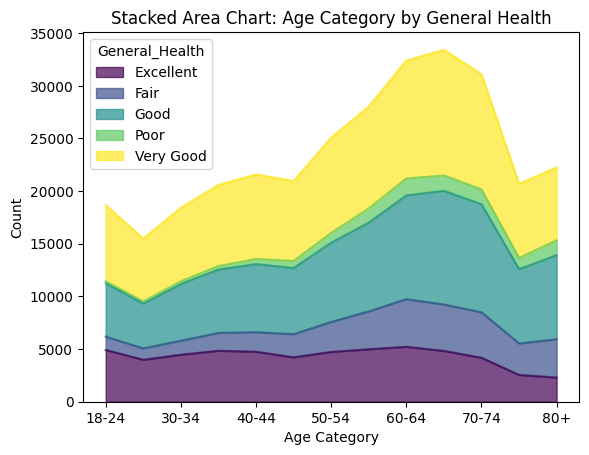

In [20]:
#age category by general health 
crosstab = pd.crosstab(data['Age_Category'], data['General_Health'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

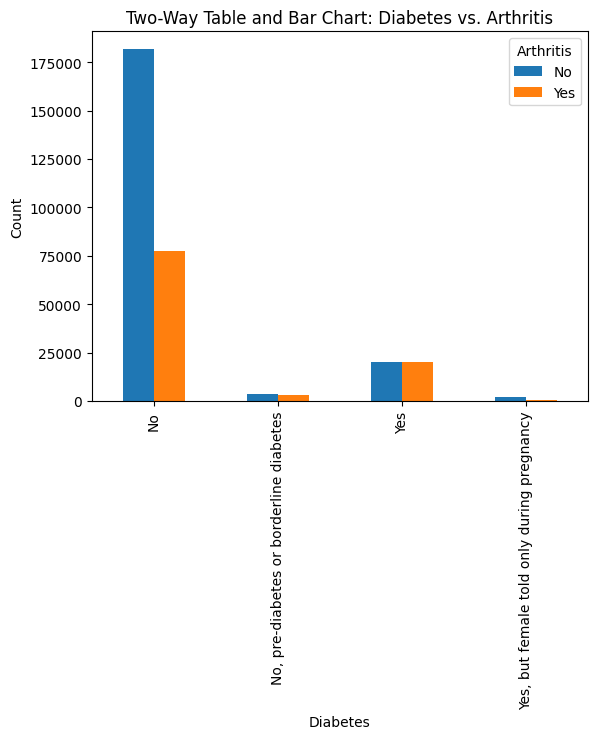

In [21]:
#athritis vs diabetes
table = pd.crosstab(data['Diabetes'], data['Arthritis'])
table.plot(kind='bar')
plt.title('Two-Way Table and Bar Chart: Diabetes vs. Arthritis')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

<h1>Feature Encoding</h1>

In [22]:
from sklearn.preprocessing import LabelEncoder

#creating a copy of the data
df_encoded = data.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df_encoded.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [23]:
#using one hot encoder for the appropriate columns
df_encoded.drop(axis=1, columns=["General_Health", "Checkup"], inplace=True)


In [24]:
df_encoded.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [25]:
#using the one hot encoder for the two columns above
data1 = data[["General_Health", "Checkup"]]
hot_encoded = pd.get_dummies(data1, drop_first=True, dtype=int)
hot_encoded.head()

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [26]:
#joining the two encoded data
encoded = df_encoded.join(hot_encoded)
encoded.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),...,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0,0,0,0,0,0,1,0,10,150.0,...,16.0,12.0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,2,0,0,10,165.0,...,0.0,4.0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,2,0,0,8,163.0,...,3.0,16.0,0,0,0,1,0,0,0,1
3,1,1,0,0,0,2,0,1,11,180.0,...,30.0,8.0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,12,191.0,...,4.0,0.0,0,1,0,0,0,0,0,1


Text(0.5, 1.0, 'Correlation Heatmap')

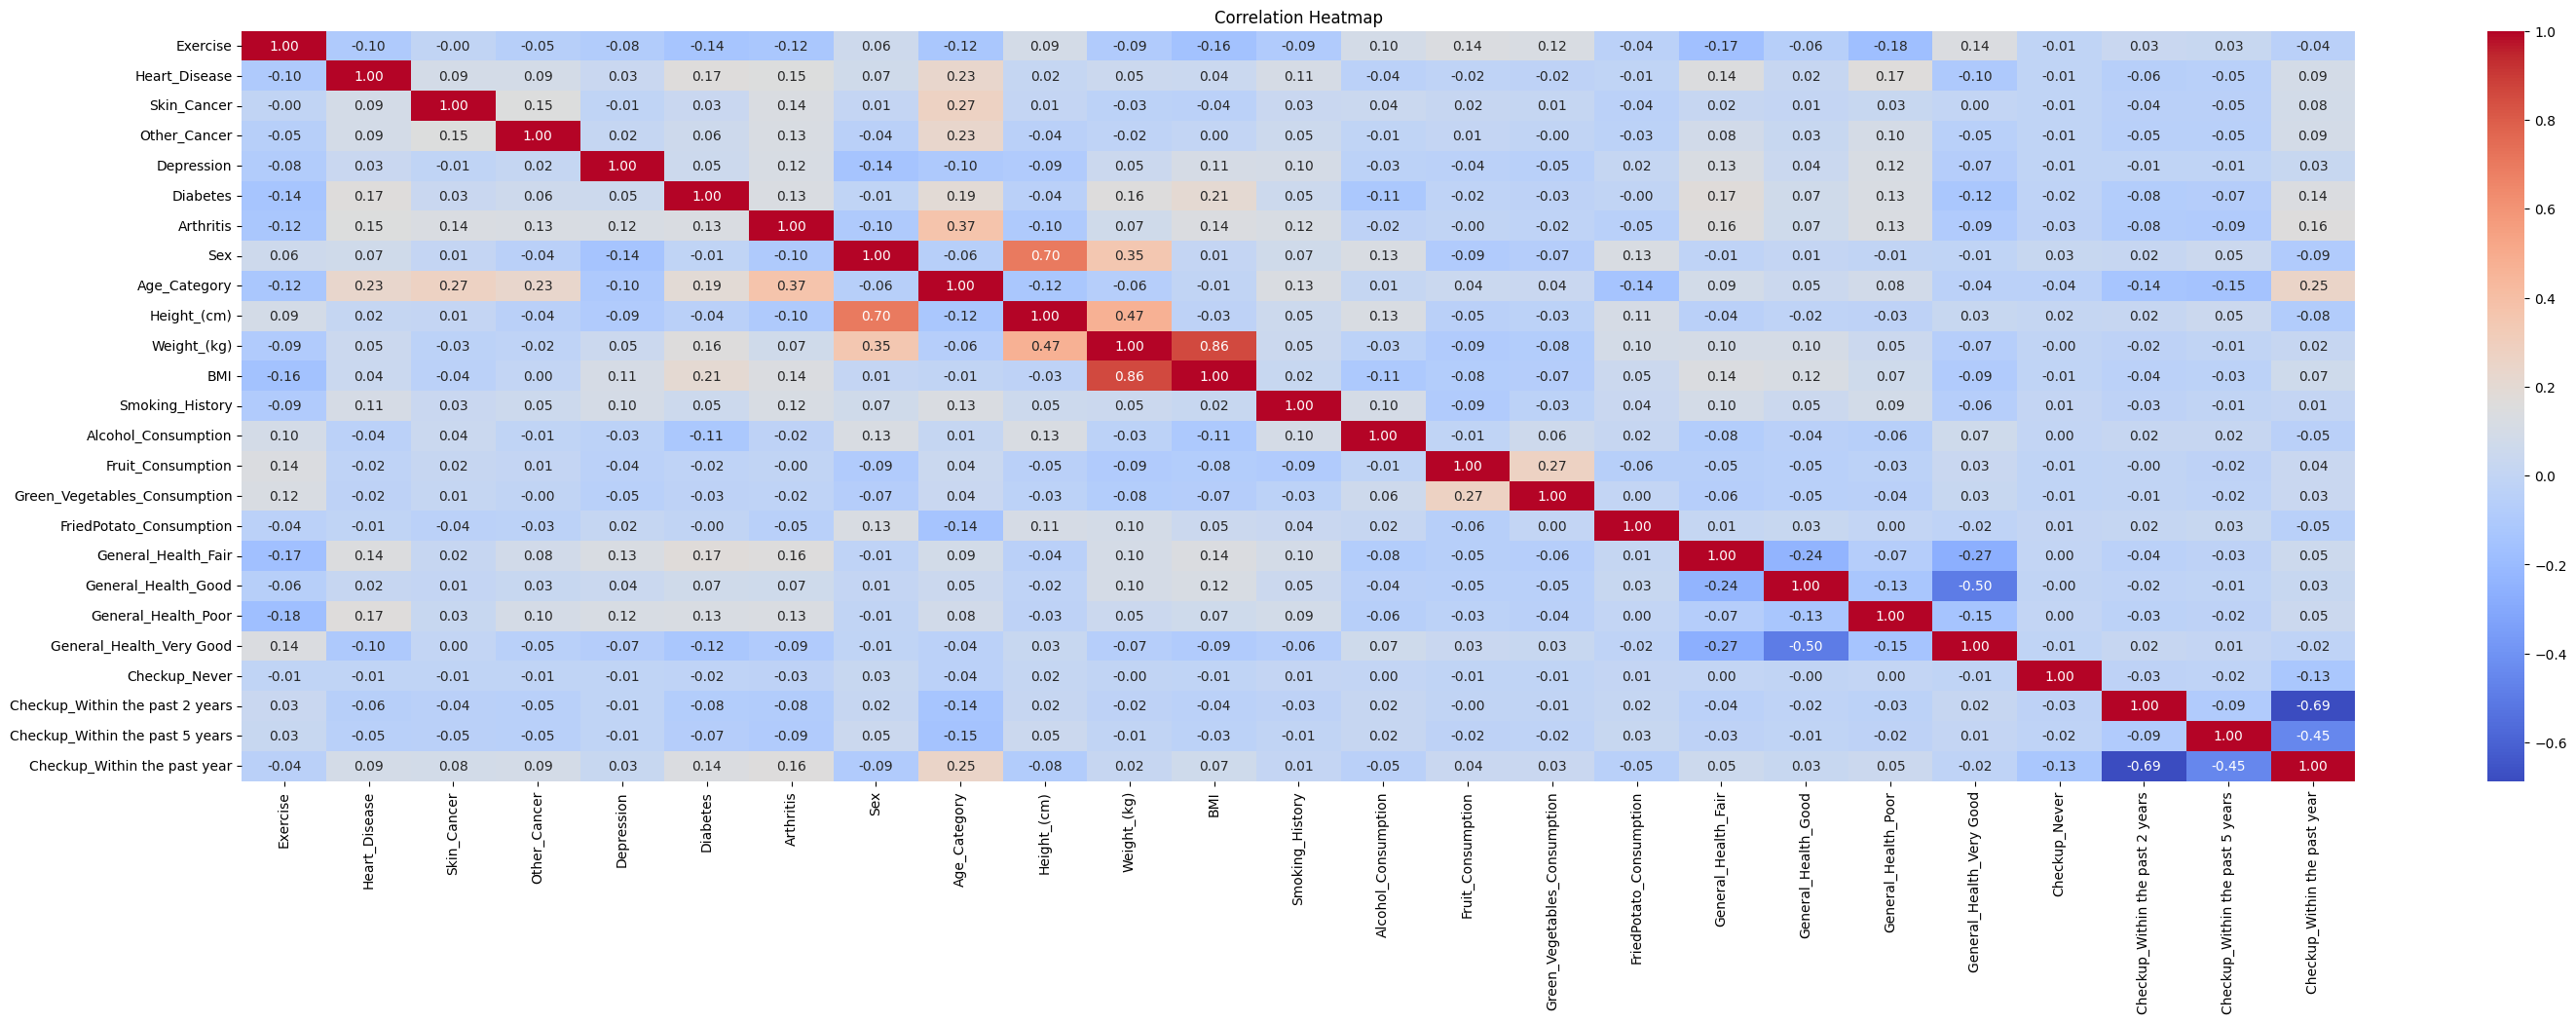

In [27]:
#checking the relatinship between the features in teh dataset
correlation_matrix = encoded.corr(method='pearson')
ax =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
fig = plt.gcf()
fig.set_size_inches(35,10)
plt.title("Correlation Heatmap")

Since none of the features are stringly correlated to the target variable, we will consider a different method of feature selection.

In [28]:
#separating the expalanatory and traget variables
y = encoded['Heart_Disease']
encoded.drop(columns=['Heart_Disease'], axis=1, inplace=True)

In [29]:
X = encoded
X.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),...,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year
0,0,0,0,0,0,1,0,10,150.0,32.66,...,16.0,12.0,0,0,1,0,0,1,0,0
1,0,0,0,0,2,0,0,10,165.0,77.11,...,0.0,4.0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,0,0,8,163.0,88.45,...,3.0,16.0,0,0,0,1,0,0,0,1
3,1,0,0,0,2,0,1,11,180.0,93.44,...,30.0,8.0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,12,191.0,88.45,...,4.0,0.0,0,1,0,0,0,0,0,1


In [30]:
#dealing with class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [31]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=32)

In [32]:
# Calculate the IQR for the selected columns in the training data
Q1 = X_train[numeric].quantile(0.25)
Q3 = X_train[numeric].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = ((X_train[numeric] < (Q1 - threshold * IQR)) |(X_train[numeric] > (Q3 + threshold * IQR))).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 185951


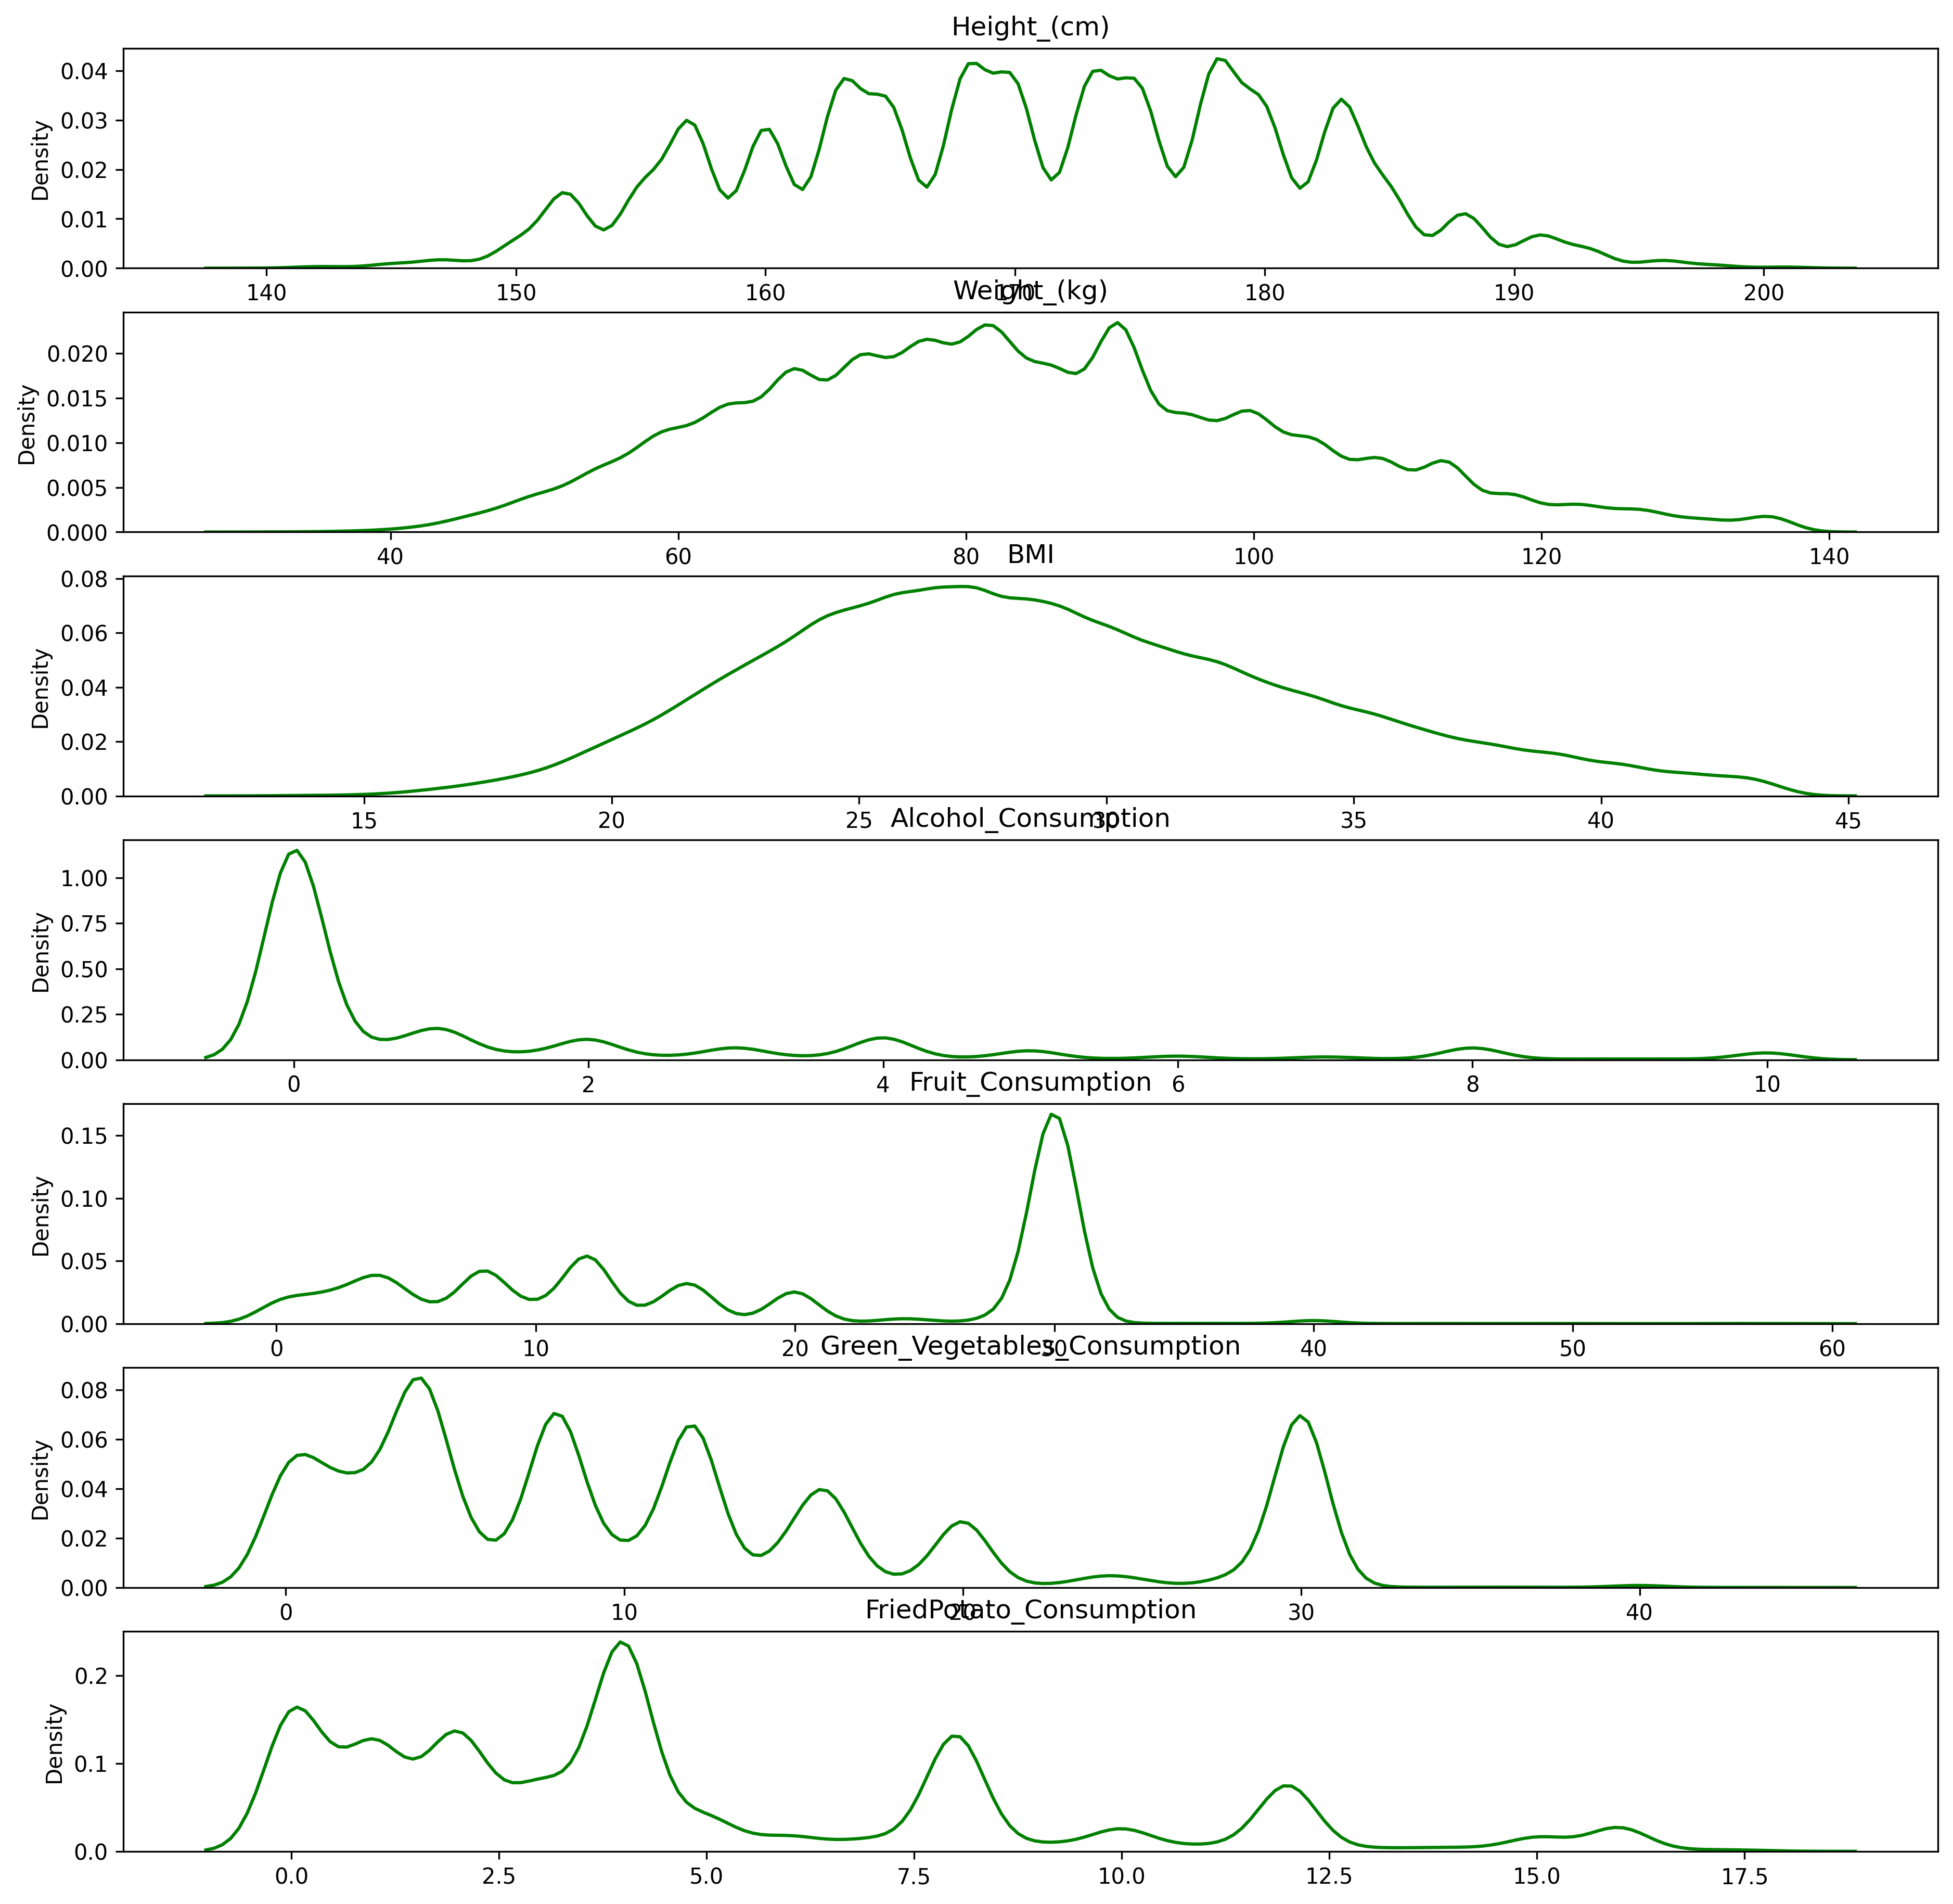

In [33]:
fig, ax = plt.subplots(7,1, figsize=(15,15), dpi=300)
ax = ax.flatten()
for i, col in enumerate(numeric):
    sns.kdeplot(X_train_clean[col],ax=ax[i],color='g')
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)

<h1>Model Building</h1>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [35]:
#creating instance of the model
logreg = LogisticRegression()

#fitting the model
logreg.fit(X_train_clean, y_train_clean)

#making predictions
logreg_predictions = logreg.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logreg_predictions)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.78
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77     56642
           1       0.76      0.83      0.79     56880

    accuracy                           0.78    113522
   macro avg       0.79      0.78      0.78    113522
weighted avg       0.79      0.78      0.78    113522



In [37]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

In [38]:
# Calculate AUC
dt_auc = roc_auc_score(y_test, dt_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier Accuracy: 0.82
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     56642
           1       0.84      0.80      0.82     56880

    accuracy                           0.82    113522
   macro avg       0.82      0.82      0.82    113522
weighted avg       0.82      0.82      0.82    113522



In [39]:
# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)


In [40]:
# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Accuracy: 0.89
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     56642
           1       0.94      0.84      0.89     56880

    accuracy                           0.89    113522
   macro avg       0.90      0.90      0.89    113522
weighted avg       0.90      0.89      0.89    113522



In [41]:
from xgboost import XGBClassifier
#create and train XGBOost
xg_boost = XGBClassifier()

xg_boost.fit(X_train_clean, y_train_clean)

#make predictions on the test set
xg_predictions = xg_boost.predict(X_test)

In [42]:
# Calculate AUC
dx_auc = roc_auc_score(y_test, xg_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xg_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, xg_predictions)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, xg_predictions))

Random Forest Classifier Accuracy: 0.93
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     56642
           1       0.97      0.89      0.93     56880

    accuracy                           0.93    113522
   macro avg       0.93      0.93      0.93    113522
weighted avg       0.93      0.93      0.93    113522



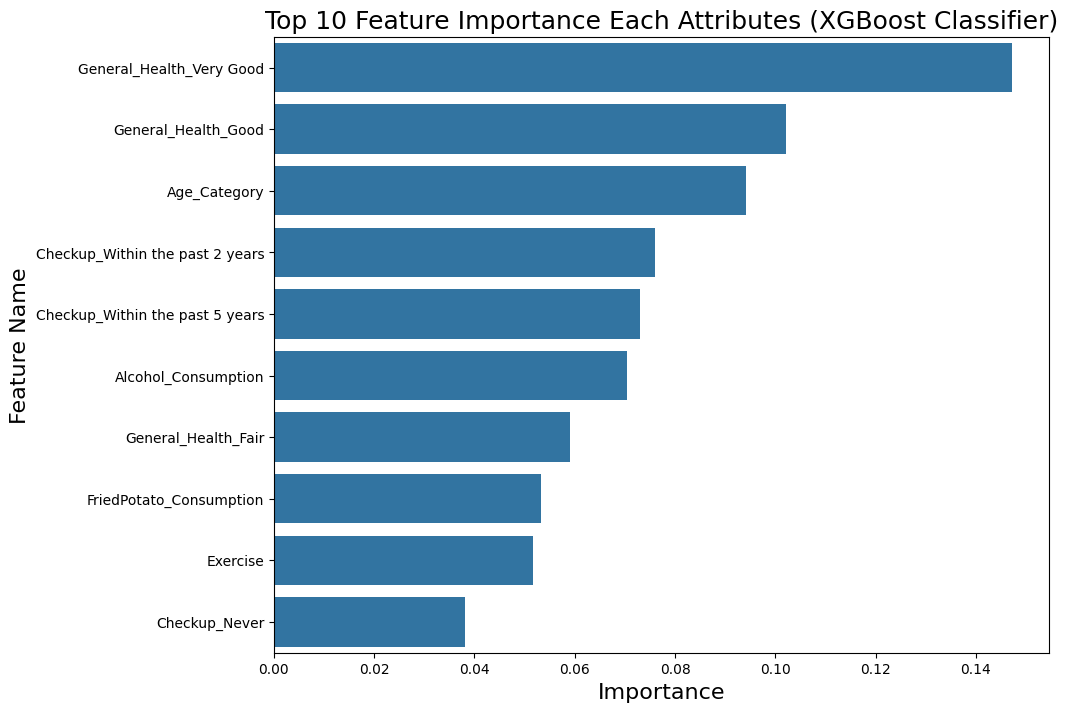

In [43]:
#using the xgboost model to detect the important features
imp_df = pd.DataFrame({
    "Feature Name": X_train_clean.columns,
    "Importance": xg_boost.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (XGBoost Classifier)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

<h1>Hyperparamter Tunning with Bayesian Search</h1>

In [44]:
from skopt import BayesSearchCV
np.int = int

In [45]:
#defining the search space for the hyperparameters
param_space = {
    'n_estimators': (50, 150),          # Number of trees
    'max_depth': (3, 5, 7),                # Maximum depth of a tree
    'learning_rate': (0.01, 1.0, 'log-uniform'),  # Learning rate
    'subsample': (0.1, 0.3, 0.5),             # Subsample ratio of the training instance
    'min_child_weight': (1, 10),         # Minimum sum of instance weight needed in a child
    'gamma': (0.0, 1.0),                 # Minimum loss reduction required to make a further partition
    'colsample_bytree': (0.5, 1.0),      # Subsample ratio of columns when constructing each tree
    'reg_alpha': (1e-9, 1.0, 'log-uniform'),  # L1 regularization term on weights
    'reg_lambda': (1e-9, 1.0, 'log-uniform'), # L2 regularization term on weights
}

In [46]:
#initialize the bayesian search optimization
bayes_search = BayesSearchCV(
    estimator=xg_boost,
    search_spaces=param_space,
    n_iter=50,            # Number of iterations
    random_state=42
)

In [47]:
#performing the bayesian search
bayes_search.fit(X_train_clean, y_train_clean)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=None, ...),
              random_state=42,
              search_spaces={'colsample_bytree': (0.5, 1.0),
                             'gamma': (0.0, 1.0),
                             'learning_rate': (0.01, 1.0, 'log-uniform'),
                             'max_depth': (3, 5, 7),
                             'min_child_weight': (1, 10),
                             'n_estimators': (50, 150),
                             'reg_alpha': (1e-09, 1.0, 'log-uniform'),
                             'reg_lambda': (1e-09, 1.0, 'log-uniform'),
                             'subsample': (0.1, 0.3, 0.5)})

In [48]:
#getting the best parameters
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_
print(f"Best parameters: {best_params}")
print(f"Best model: {best_model}")

Best parameters: OrderedDict({'colsample_bytree': 1.0, 'gamma': 1.0, 'learning_rate': 0.27092485413360423, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150, 'reg_alpha': 1e-09, 'reg_lambda': 1.0, 'subsample': 0.5})
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.27092485413360423,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
#evalauate the model
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.930753510332799


In [51]:
#checking for overfitting in the model
train_accuracy = best_model.score(X_train_clean, y_train_clean)
print("Train Accuracy", train_accuracy)

Train Accuracy 0.9477013273263641
